In [3]:
# importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configuración de visualización
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

In [5]:
# Cargar Data
viajes = pd.read_csv('Data.csv')
estaciones = pd.read_csv('stations.csv')
print("Datos cargados exitosamente")

Datos cargados exitosamente


In [6]:
# Mostrar información básica del dataset
print("Información del dataset de viajes:")
print(viajes.info())

print("\nPrimeras filas del dataset:")
viajes.head()

Información del dataset de viajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622360 entries, 0 to 1622359
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   Genero_Usuario         1622360 non-null  object
 1   Edad_Usuario           1622360 non-null  int64 
 2   Bici                   1622360 non-null  object
 3   Ciclo_Estacion_Retiro  1622360 non-null  int64 
 4   Fecha_Retiro           1622360 non-null  object
 5   Hora_Retiro            1622360 non-null  object
 6   Ciclo_Estacion_Arribo  1622360 non-null  int64 
 7   Fecha_Arribo           1622360 non-null  object
 8   Hora_Arribo            1622360 non-null  object
dtypes: int64(3), object(6)
memory usage: 111.4+ MB
None

Primeras filas del dataset:


,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,23,11925,279,2019-01-06,06:52:49,294,2019-01-06,06:58:59
1,M,37,98,103,2019-01-11,14:07:24,254,2019-01-11,14:11:00
2,M,26,10441,174,2019-01-03,10:18:32,27,2019-01-03,10:26:10
3,M,32,9082,176,2019-01-09,08:34:16,19,2019-01-09,08:43:47
4,M,55,10453,45,2019-01-27,08:10:21,256,2019-01-27,08:28:22


In [10]:
# Crear categorías de edad 
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
viajes['grupo_edad'] = pd.cut(viajes['Edad_Usuario'], bins=bins, labels=labels)

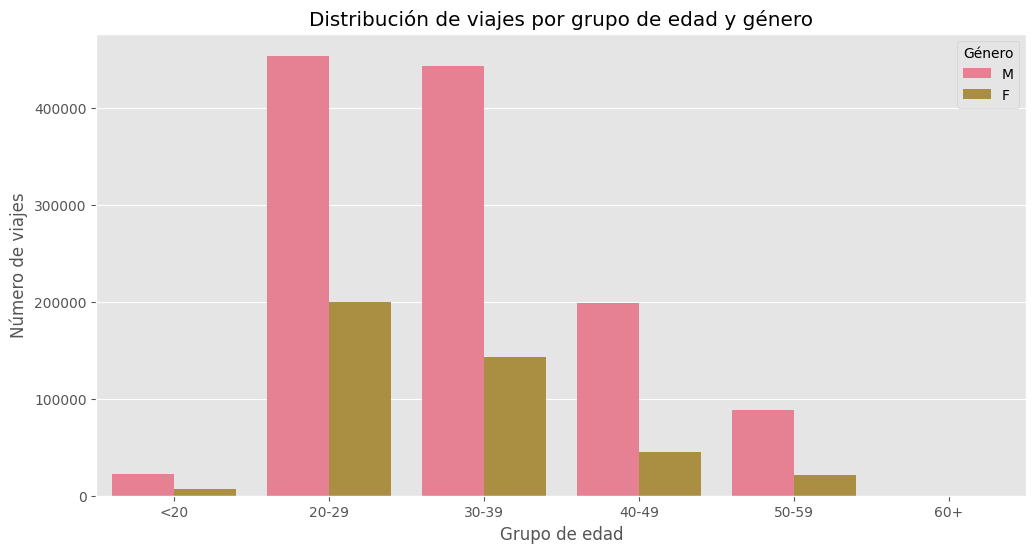

In [13]:
# Análisis de distribución por edad y género
plt.figure(figsize=(12, 6))
sns.countplot(data=viajes, x='grupo_edad', hue='Genero_Usuario')
plt.title('Distribución de viajes por grupo de edad y género')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de viajes')
plt.legend(title='Género')
plt.show()

In [15]:
# Tabla de contingencia para edad y género
tabla_contingencia = pd.crosstab(viajes['grupo_edad'], viajes['Genero_Usuario'])
print("Tabla de contingencia edad-género:")
print(tabla_contingencia)

Tabla de contingencia edad-género:
Genero_Usuario       F       M
grupo_edad                    
<20               6763   22465
20-29           199725  453633
30-39           142986  442802
40-49            45322  199102
50-59            21082   88480


In [16]:
# Prueba chi-cuadrado para independencia
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)
print(f"\nResultado prueba chi-cuadrado: chi2={chi2:.2f}, p-value={p:.4f}")


Resultado prueba chi-cuadrado: chi2=17699.97, p-value=0.0000


La distribución de género no es uniforme entre los grupos de edad.

In [19]:
# Convertir fechas y horas a datetime
viajes['FechaHora_Retiro'] = pd.to_datetime(viajes['Fecha_Retiro'] + ' ' + viajes['Hora_Retiro'])
viajes['FechaHora_Arribo'] = pd.to_datetime(viajes['Fecha_Arribo'] + ' ' + viajes['Hora_Arribo'])

# Calcular duración del viaje en minutos
viajes['duracion_viaje'] = (viajes['FechaHora_Arribo'] - viajes['FechaHora_Retiro']).dt.total_seconds() / 60

In [24]:
# ANOVA para comparar medias entre grupos de edad
grupos = [group['duracion_viaje'] for name, group in viajes.groupby('grupo_edad') if len(group) > 0]
f_stat, p_value = stats.f_oneway(*grupos)
print(f"Resultado ANOVA: F={f_stat:.2f}, p-value={p_value:.4f}")

Resultado ANOVA: F=0.39, p-value=0.8164


F = 0.39 → Indica cuánta variabilidad hay entre los grupos en comparación con la variabilidad dentro de cada grupo. Un valor bajo sugiere que las diferencias entre grupos no son grandes.

p-value = 0.8164 → Es la probabilidad de obtener estos resultados si las medias de los grupos fueran realmente iguales.


si hay diferencias significativas en la duración promedio del viaje entre los grupos de edad.